In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
si = SimpleImputer(strategy='mean', missing_values=0)

In [5]:
impute_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[impute_features] = si.fit_transform(df[impute_features])

In [6]:
dataset = df.to_numpy()

In [7]:
dataset_x = dataset[:, :-1]
dataset_y = dataset[:, -1]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y, test_size=0.2)

In [14]:
from tensorflow.keras.callbacks import Callback

In [12]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs):
        loss = logs['loss']
        val_loss = logs['val_loss']
        print(f'epoch: {epoch}, loss: {loss}, val_loss: {val_loss}')

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Normalization, Dense

In [16]:
import numpy as np

In [17]:
mins = np.min(training_dataset_x, axis=0)
maxmin_diffs = np.max(training_dataset_x, axis=0) - np.min(training_dataset_x, axis=0)

In [28]:
norm_layer = Normalization()  # Standard Scalar
norm_layer.adapt(training_dataset_x)

In [18]:
norm_layer = Normalization(mean=mins, variance=maxmin_diffs ** 2)   # minmax scalar

In [30]:
model = Sequential(name='Diabetes')

In [31]:
model.add(Input((training_dataset_x.shape[1],)))
model.add(norm_layer)
model.add(Dense(16, activation='relu', name='Hidden-1'))
model.add(Dense(16, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))
model.summary()

Model: "Diabetes"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-1 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-2 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450 (1.76 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 17 (72.00 B)

In [32]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [33]:
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=100, validation_split=0.2)
eval_result = model.evaluate(test_dataset_x, test_dataset_y, batch_size=32)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - binary_accuracy: 0.4323 - loss: 0.7269 - val_binary_accuracy: 0.4797 - val_loss: 0.7101
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.5625 - loss: 0.6667 - val_binary_accuracy: 0.6098 - val_loss: 0.6729
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.7373 - loss: 0.6317 - val_binary_accuracy: 0.6504 - val_loss: 0.6440
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.7404 - loss: 0.6074 - val_binary_accuracy: 0.6504 - val_loss: 0.6192
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.7263 - loss: 0.5828 - val_binary_accuracy: 0.6585 - val_loss: 0.5983
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.7658 - loss: 0.5489 - val_binary_accuracy: 0.6911 - val_loss: 0.5791
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.7362 - loss: 0.5328 - val_binary_accuracy: 0.6911 - val_loss: 0.5665
Epoch 8/100


In [17]:
mycallback = MyCallback()

In [ ]:
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=300, validation_split=0.2, callbacks=[mycallback], verbose=0)

In [24]:
def on_epoch_end_proc(epoch, logs):
    pass
def on_batch_begin_proc(batch, logs):
    pass
def on_batch_end_proc(batch, logs):
    pass

from tensorflow.keras.callbacks import LambdaCallback

lambda_callback = LambdaCallback(on_epoch_end=on_epoch_end_proc, on_batch_begin=on_batch_begin_proc, on_batch_end=on_batch_end_proc)
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=300, validation_split=0.2, callbacks=[lambda_callback], verbose=0)

In [16]:
class MyLambdaCallback(Callback):
    def __init__(self, on_epoch_begin=None, on_epoch_end=None, on_batch_begin=None,  on_batch_end=None):
        self._on_epoch_begin = on_epoch_begin
        self._on_epoch_end = on_epoch_end
        self._on_batch_begin = on_batch_begin
        self._on_batch_end = on_batch_end
        
    def on_epoch_begin(self, epoch, logs):
        if self._on_epoch_begin:
            self._on_epoch_begin(epoch, logs)
    
    def on_epoch_end(self, epoch, logs):
        if self._on_epoch_end:
            self._on_epoch_end(epoch, logs)
    
    def on_batch_begin(self, batch, logs):
        if self._on_batch_begin:
            self._on_batch_begin(batch, logs)
                
    def on_batch_end(self, batch, logs):
        if self._on_batch_end:
            self._on_batch_end(batch, logs)


In [18]:
batch_losses= []

In [19]:
def on_epoch_begin_proc(epoch, logs):
    global batch_losses
    batch_losses = []
    print(f'eopch: {epoch}')    


def on_epoch_end_proc(epoch, logs):
    loss = logs['loss']
    val_loss = logs['val_loss']
    print(f'\nepoch: {epoch}, loss: {loss}, val_loss: {val_loss}')
    print(f'batch mean: {np.mean(batch_losses)}')
    print('-' * 30)
  
def on_batch_end_proc(batch, logs):
    global total
    loss = logs['loss']
    batch_losses.append(loss)
    print(f'\t\tbatch: {batch}, loss: {loss}')

In [20]:
mylambda_callback = MyLambdaCallback(on_epoch_begin=on_epoch_begin_proc, on_epoch_end=on_epoch_end_proc, on_batch_end=on_batch_end_proc)

In [ ]:
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=100, validation_split=0.2, callbacks=[mylambda_callback], verbose=0)

In [24]:
import matplotlib.pyplot as plt

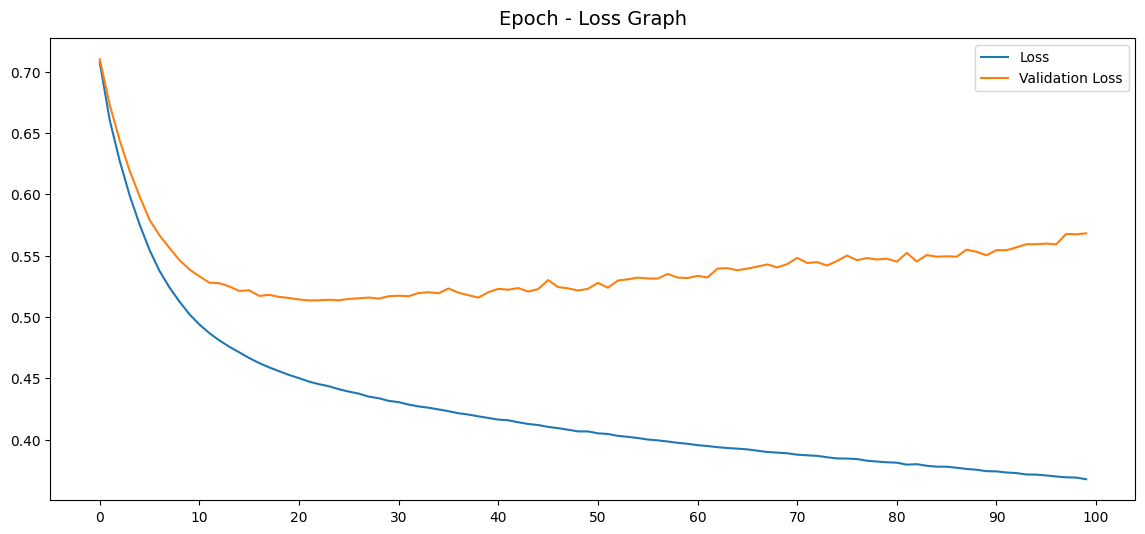

In [34]:
plt.figure(figsize=(14, 6))
plt.title('Epoch - Loss Graph', pad=10, fontsize=14)
plt.xticks(range(0, 300, 10))
plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

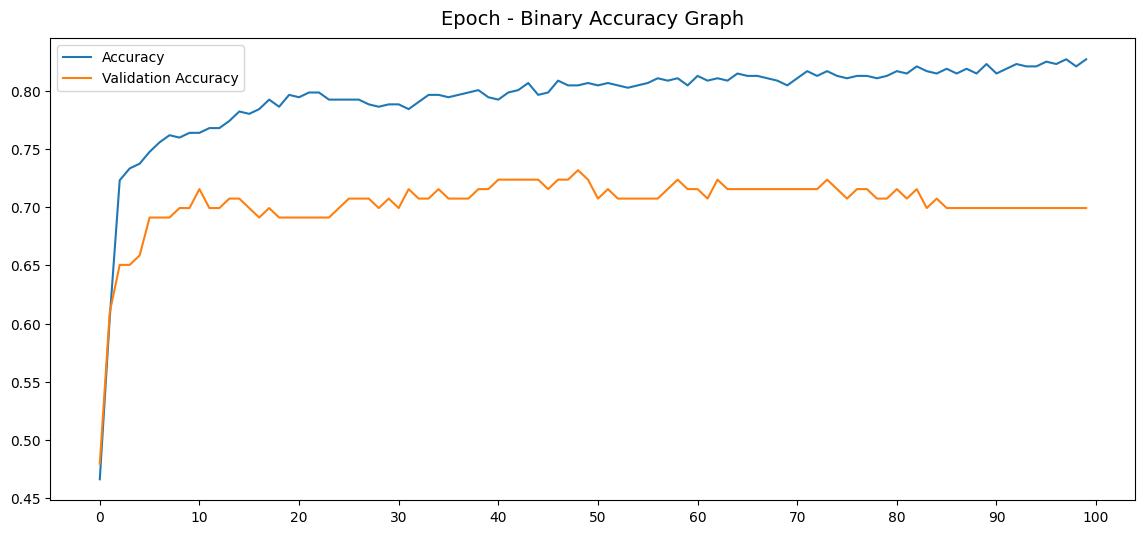

In [35]:
plt.figure(figsize=(14, 6))
plt.title('Epoch - Binary Accuracy Graph', pad=10, fontsize=14)
plt.xticks(range(0, 300, 10))
plt.plot(hist.epoch, hist.history['binary_accuracy'])
plt.plot(hist.epoch, hist.history['val_binary_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

In [ ]:
eval_result = model.evaluate(test_dataset_x, test_dataset_y, batch_size=32)

In [36]:
for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]}: {eval_result[i]}')

loss: 0.43200767040252686
compile_metrics: 0.7857142686843872


In [38]:
predict_dataset = np.array([[2 ,90, 68, 12, 120, 38.2, 0.503, 28],
                            [4, 111, 79, 47, 207, 37.1, 1.39, 56],
                            [3, 190, 65, 25, 130, 34, 0.271, 26],
                            [8, 176, 90, 34, 300, 50.7, 0.467, 58],
                            [7, 106, 92, 18, 200, 35, 0.300, 48]])

model.save('diabetes.h5')

from tensorflow.keras.models import load_model

model = load_model('diabetes.h5')

predict_result = model.predict(predict_dataset)
print(predict_result)

for result in predict_result[:, 0]:
    print('Şeker hastasi' if result > 0.5 else 'Şeker Hastasi Değil')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Şeker hastasi
Şeker hastasi
Şeker hastasi
Şeker hastasi
Şeker hastasi
